In [260]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [261]:
# Load your dataset
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [263]:
# Convert 'TotalCharges' to numeric and handle missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [264]:
# Encode binary categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    data[col] = LabelEncoder().fit_transform(data[col])
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [265]:
# One-hot encoding for columns with more than two categories
data = pd.get_dummies(data, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 
                                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                     'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,False,False,False,True,False,True,False,True,False,True
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,False,True,False,True,False,False,False,True,False,True
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,False,False,False,False,False,False,False,False,False,False
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,False,False,False,False,False,False,False,False,False,False


In [266]:
# Check for boolean columns
boolean_columns = data.select_dtypes(include='bool').columns
print(boolean_columns)

# Convert any boolean columns to 0/1
data[boolean_columns] = data[boolean_columns].astype(int)

# Now print the dataset
data


Index(['InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,84.80,1990.50,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,103.20,7362.90,...,0,1,0,1,0,0,0,1,0,1
7040,4801-JZAZL,0,0,1,1,11,0,1,29.60,346.45,...,0,0,0,0,0,0,0,0,0,0
7041,8361-LTMKD,1,1,1,0,4,1,1,74.40,306.60,...,0,0,0,0,0,0,0,0,0,0


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   gender                                 7043 non-null   int32  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int32  
 4   Dependents                             7043 non-null   int32  
 5   tenure                                 7043 non-null   int64  
 6   PhoneService                           7043 non-null   int32  
 7   PaperlessBilling                       7043 non-null   int32  
 8   MonthlyCharges                         7043 non-null   float64
 9   TotalCharges                           7043 non-null   float64
 10  Churn                                  7043 non-null   int32  
 11  Inte

In [268]:
# Define features (X) and target (y)
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

In [269]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [270]:
# Scale numerical features (StandardScaler for continuous features)
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [271]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [272]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [273]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

acc=accuracy_score(y_test,y_pred)
print("\nAccuracy : {}%".format(round(acc*100,2)))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       518
           1       0.70      0.48      0.57       187

    accuracy                           0.81       705
   macro avg       0.77      0.70      0.72       705
weighted avg       0.80      0.81      0.79       705

Confusion Matrix:
[[480  38]
 [ 98  89]]
ROC-AUC Score: 0.8301622860446389

Accuracy : 80.71%


In [296]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), rf_model)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Scores: [0.80141844 0.80851064 0.7858156  0.79403409 0.78835227 0.75426136
 0.81107955 0.78835227 0.796875   0.80113636]
Mean Accuracy: 0.7930
Standard Deviation: 0.02


In [304]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
8,TotalCharges,0.201085
7,MonthlyCharges,0.172508
4,tenure,0.166196
14,PaymentMethod_Electronic check,0.039821
9,InternetService_Fiber optic,0.035314
12,Contract_Two year,0.032071
0,gender,0.027974
6,PaperlessBilling,0.026176
2,Partner,0.023954
19,OnlineSecurity_Yes,0.023908


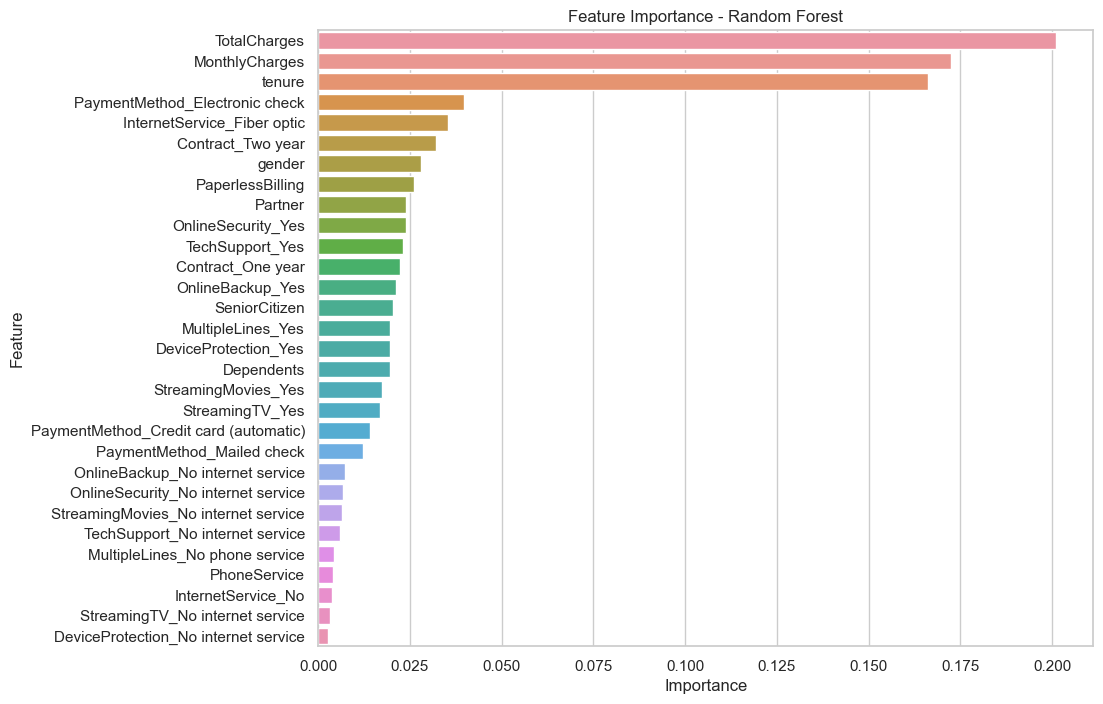

In [306]:
# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, orient='h')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


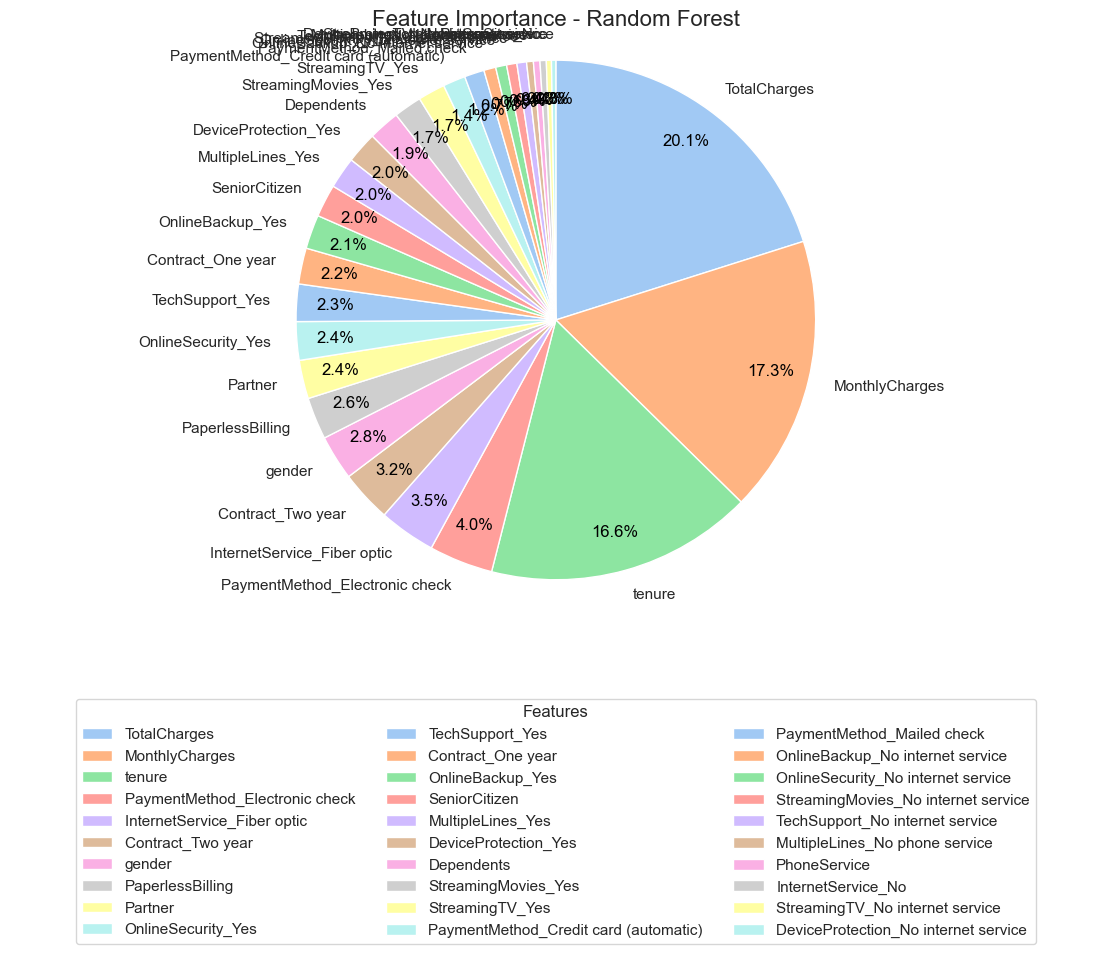

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set Seaborn style
sns.set(style="whitegrid")

importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a pie chart
plt.figure(figsize=(12, 10))  # Increase figsize to make the chart bigger

# Set a color palette using Seaborn
colors = sns.color_palette('pastel', len(importance_df))

# Pie chart with feature importances
wedges, texts, autotexts = plt.pie(
    importance_df['Importance'],
    labels=importance_df['Feature'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    pctdistance=0.85,
    colors=colors
)

# Improve text appearance
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)  # Adjust fontsize if needed

# Add a legend below the pie chart
plt.legend(wedges, importance_df['Feature'], title="Features", loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.title('Feature Importance - Random Forest', fontsize=16)  # Increase fontsize for the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to fit the legend and title
plt.show()


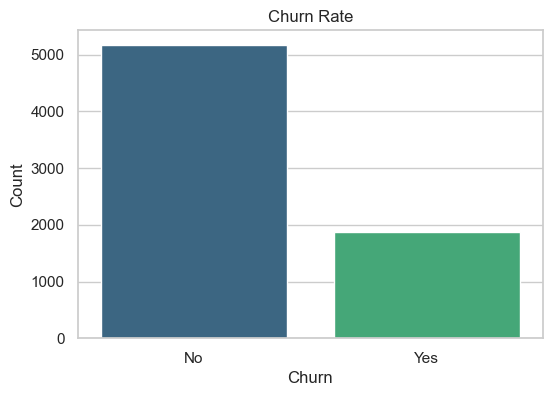

In [310]:
# Create a count plot to show the number of churned vs. non-churned customers
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='viridis')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Assuming 'No' and 'Yes' are the values in the 'Churn' column
plt.show()


In [279]:
top_features = importance_df['Feature'].head(3)

# Filter the dataset to include only the top 10 features
X_top = X[top_features]


In [280]:
# Split the data using the top features
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.1, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy : {}%".format(round(accuracy*100,2)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       511
           1       0.64      0.50      0.56       194

    accuracy                           0.78       705
   macro avg       0.73      0.70      0.71       705
weighted avg       0.77      0.78      0.78       705


Accuracy : 78.44%
